In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, no_update
import plotly.express as px
import dash_bootstrap_components as dbc
from dash import Dash, dash_table

from urllib.request import urlopen
import json

from dash import Dash, dash_table
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

### Read the super data 

In [2]:
super_df = pd.read_csv("../../../../data/stage_3/super_df.csv")

### I am creating a sub dataset of the original as there are two many columns and I want to highlight only few columns for better analysis and visualisation

In [3]:
data = super_df[['County', 'State' ,'Norm_deaths'  , 'County Code', 'Drug overdose deaths raw value', 'Premature death raw value', 'Injury deaths raw value', 'Adult smoking raw value' , 'Excessive drinking raw value', 'Firearm fatalities raw value' , 'Insufficient sleep raw value',  'Unemployment raw value', 'Life expectancy raw value',  'Homicides raw value','Violent crime raw value' , 'Population']]

### Normalizing the variables of interest by dividing with the population column and multiplying by 100000 to get per 100,000 population

In [4]:
data['Drug_overdose_deaths_raw_value_Norm'] = (data['Drug overdose deaths raw value']/super_df['Population'] * 100000)
data['Injury_deaths_raw_value_Norm'] = (data['Injury deaths raw value']/super_df['Population'] * 100000)
data['Adult_smoking_raw_value_Norm'] = (data['Adult smoking raw value']/super_df['Population'] * 100000)
data['Firearm_fatalities_raw_value_Norm'] = (data['Firearm fatalities raw value']/super_df['Population'] * 100000)
data['Insufficient_sleep_raw_value_Norm'] = (data['Insufficient sleep raw value']/super_df['Population'] * 100000)

data['Premature_death_raw_value_Norm'] = (data['Premature death raw value']/super_df['Population'] * 100000)
data['Excessive_drinking_raw_value_Norm'] = (data['Excessive drinking raw value']/super_df['Population'] * 100000)
data['Unemployment_raw_value_Norm'] = (data['Unemployment raw value']/super_df['Population'] * 100000)
data['Life_expectancy_raw_value_Norm'] = (data['Life expectancy raw value']/super_df['Population'] * 100000)
data['Homicides_raw_value_Norm'] = (data['Homicides raw value']/super_df['Population'] * 100000)
data['Violent_crime_raw_value_Norm'] = (data['Violent crime raw value']/super_df['Population'] * 100000)

In [5]:
data.head(5)

,County,State,Norm_deaths,County Code,Drug overdose deaths raw value,Premature death raw value,Injury deaths raw value,Adult smoking raw value,Excessive drinking raw value,Firearm fatalities raw value,...,Injury_deaths_raw_value_Norm,Adult_smoking_raw_value_Norm,Firearm_fatalities_raw_value_Norm,Insufficient_sleep_raw_value_Norm,Premature_death_raw_value_Norm,Excessive_drinking_raw_value_Norm,Unemployment_raw_value_Norm,Life_expectancy_raw_value_Norm,Homicides_raw_value_Norm,Violent_crime_raw_value_Norm
0,"Abbeville County, SC",SC,7.0,45001,17.443577,9517.898548,83.535478,0.174334,0.156044,23.3,...,15.602763,0.032562,4.351976,0.067397,1777.753848,0.029146,0.008560,14.201716,1.494241,63.728072
1,"Acadia Parish, LA",LA,19.0,22001,13.843631,10194.322670,79.039494,0.210474,0.190483,21.1,...,6.176278,0.016447,1.648789,0.025285,796.601359,0.014885,0.004617,5.875374,0.804859,34.648551
2,"Accomack County, VA",VA,11.0,51001,11.171482,10459.767290,82.000073,0.164887,0.151416,18.2,...,11.291836,0.022706,2.506235,0.050607,1440.364325,0.020851,0.006640,10.457706,1.721315,31.103196
3,"Ada County, ID",ID,12.0,16001,13.706962,5027.391209,59.693597,0.117813,0.193106,11.7,...,0.738467,0.001457,0.144740,0.003253,62.193617,0.002389,0.000344,0.998518,0.018556,2.853156
4,"Adair County, KY",KY,11.0,21001,NaN,9140.796987,88.793248,0.232604,0.145439,11.5,...,22.887807,0.059957,2.964300,0.093850,2356.179143,0.037489,0.016322,19.704959,NaN,10.208522


In [6]:
#Fill the NAN values with 0.0001 
data = data.fillna(0.0001)

#### To plot the log values of the variables its necessary to get the log of the values and for this task I am using np.log() 
* https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [7]:
data["Norm_deaths_log"] = np.log(data["Norm_deaths"])
data['Drug_overdose_deaths_raw_value_log'] = np.log(data['Drug overdose deaths raw value'])
data["Injury_deaths_raw_value_log"] = np.log(data["Injury deaths raw value"])
data["Adult_smoking_raw_value_log"] = np.log(data["Adult smoking raw value"])
data["Firearm_fatalities_raw_value_log"] = np.log(data["Firearm fatalities raw value"])
data["Insufficient_sleep_raw_value_log"] = np.log(data["Insufficient sleep raw value"])

data["Premature_death_raw_value_log"] = np.log(data["Premature death raw value"])
data["Excessive_drinking_raw_value_log"] = np.log(data["Excessive drinking raw value"])
data["Unemployment_raw_value_log"] = np.log(data["Unemployment raw value"])
data["Life_expectancy_raw_value_log"] = np.log(data["Life expectancy raw value"])
data["Homicides_raw_value_log"] = np.log(data["Homicides raw value"])
data['Violent_crime_raw_value_log'] = np.log(data['Violent crime raw value'])

#### From the above data I want to get the unique states so that this will help us to create a dropdown for states variable. Also I am creating a variables dataframe so that it does not contain information like deaths , state , county as I want only the variabes of interest to be filtered from the original dataframe.  

In [8]:
states = data.State.unique()

#remove state and norm_deaths from the columns
variables = data[['Drug_overdose_deaths_raw_value_Norm',
 'Injury_deaths_raw_value_Norm',
 'Adult_smoking_raw_value_Norm',
 'Firearm_fatalities_raw_value_Norm',
 'Insufficient_sleep_raw_value_Norm',
 'Premature_death_raw_value_Norm',
 'Excessive_drinking_raw_value_Norm',
 'Unemployment_raw_value_Norm',
 'Life_expectancy_raw_value_Norm',
 'Homicides_raw_value_Norm',
 'Violent_crime_raw_value_Norm' ,
 'Drug_overdose_deaths_raw_value_log',
 'Injury_deaths_raw_value_log',
 'Adult_smoking_raw_value_log',
 'Firearm_fatalities_raw_value_log',
 'Insufficient_sleep_raw_value_log',
 'Premature_death_raw_value_log',
 'Excessive_drinking_raw_value_log',
 'Unemployment_raw_value_log',
 'Life_expectancy_raw_value_log',
 'Homicides_raw_value_log', 'Violent_crime_raw_value_log']]

#Store all the variables
variables = variables.columns

#### Creating a dashboard with Data Table , Map , dropdowns to select the state and variables of interest , radio buttons to toggle between linear and log variables.


I used the states and variables column which I created above and used in the dropdown component to display the values. The state and the variables dropdown have radiobuttons linear and log. One to control the opiod deaths either linear or log value and the other is for the variables. The graph generated in the dashboard, x-axis is constant with deaths column and the only changing parameter is the y-axis. The dashboard also has a map which is linked to the dropdown. So on click of a particular state the data table should display the values for the chosen state. 

In [9]:
import statsmodels.formula.api as smf
app = JupyterDash(__name__)
PAGE_SIZE = 10
app.layout = html.Div([
    html.H1("OPIOD MORTALITY DASHBOARD" , style={'textAlign': 'center'}),
    html.P("This is a simple opiod dashboard to view the variables that affect opiod mortality rate. The dashboard allows you to select a state and also the variables of interest to view the linear and log graph. The dashboard also has a Map display which gives the county wise information of the variables."),
    dcc.Graph(id='fig'),
    
    
    html.Div([

        html.Div([
            dcc.Dropdown(states, 'NC',
                id='state-dropdown',
            ),
            dcc.RadioItems(
                ['Non-Linear', 'Log'],
                'Non-Linear',
                id='radio-button-norm_deaths',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown( variables,
                'Life_expectancy_raw_value_Norm',
                id='variables-dropdown'
            ),
            dcc.RadioItems(
                ['Non-Linear', 'Log'],
                'Non-Linear',
                id='radio-button',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),
 
    html.Div([  
    dcc.RadioItems(
    id = 'map-graph',

    options=[{'label': 'graph', 'value': 'graph'},{'label': 'Map', 'value': 'Map'}],
    value='graph' )]),
     
    html.H1("Data Table" , style={'textAlign': 'center'}),

    
    html.Div([
    dash_table.DataTable(id="table-container", data = data.to_dict('records') , columns=[{"name": i, "id": i} for i in data.columns], page_size=PAGE_SIZE,
                        style_data={
        'color': 'black',
        'backgroundColor': 'white'
    },
    style_data_conditional=[
        {
            'if': {'row_index': 'odd'},
            'backgroundColor': 'rgb(220, 220, 220)'
             
            
        }
    ],  style_table={'height': '300px', 'overflowY': 'auto'} , 
    style_header={
        'backgroundColor': 'rgb(210, 210, 210)',
        'color': 'black',
        'fontWeight': 'bold',
       
    },
                       
    ),
]
)
 
    
])

# Define callback to update
@app.callback(
    Output('fig', 'figure'),
    Output("table-container", "data"), 
    Input('state-dropdown', 'value'),
    Input('variables-dropdown', 'value') , 
    Input('radio-button', 'value') ,
    Input('radio-button-norm_deaths', 'value'),
    Input('map-graph', 'value')
    )

def update_figure(value , value1 , value2 , value3 , value4):
    df = data[data['State'] == value]
    
    if value4 == 'graph':
        
        if value2 == 'Non-Linear' and value3 == 'Non-Linear':
           
            fig1 = px.scatter(df, x='Norm_deaths', y = value1 , trendline="lowess", trendline_color_override="red" ,  color = "State" )
            fig1.update_traces(marker={'size': 15})
            return fig1 , df.to_dict('records')
    
        elif value2  == 'Non-Linear' and value3 == 'Log':
            fig2 = px.scatter(df , x= "Norm_deaths_log", y = value1, trendline="lowess", trendline_color_override="red" , color = "State")
            fig2.update_traces(marker={'size': 15})
            return fig2 , df.to_dict('records')
        

        elif value2  == 'Log' and value3 == 'Non-Linear':
            fig3 = px.scatter( df , x= "Norm_deaths", y = value1, trendline="lowess",  trendline_color_override="red" , color = "State")
            fig3.update_traces(marker={'size': 15})
            return fig3, df.to_dict('records')

        elif value2  == 'Log' and value3 == 'Log':
            fig4 = px.scatter( df , x= "Norm_deaths_log", y = value1, trendline="lowess", trendline_color_override="red",  color = "State")
            fig4.update_traces(marker={'size': 15})
            return fig4, df.to_dict('records')
     
    elif value4 == 'Map':
        with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
            counties = json.load(response)

        dff = data
        #dff = data[data['State'] == value]
        fig5 = px.choropleth(dff, geojson=counties, locations='County Code', color = value1,
                                   color_continuous_scale="Viridis",
                                   range_color=(dff[value1].min(),dff[value1].max()),
                                   scope="usa",
                                   labels={'Norm_deaths':'Norm Deaths'}
                                  )
        fig5.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        return fig5, df.to_dict('records')
    

    
    
# Run app and display 
if __name__ == '__main__':
    app.run_server(debug=True , port = 8081)

Dash app running on http://127.0.0.1:8081/


### Screenshots of the Dashboard

#### DataTable

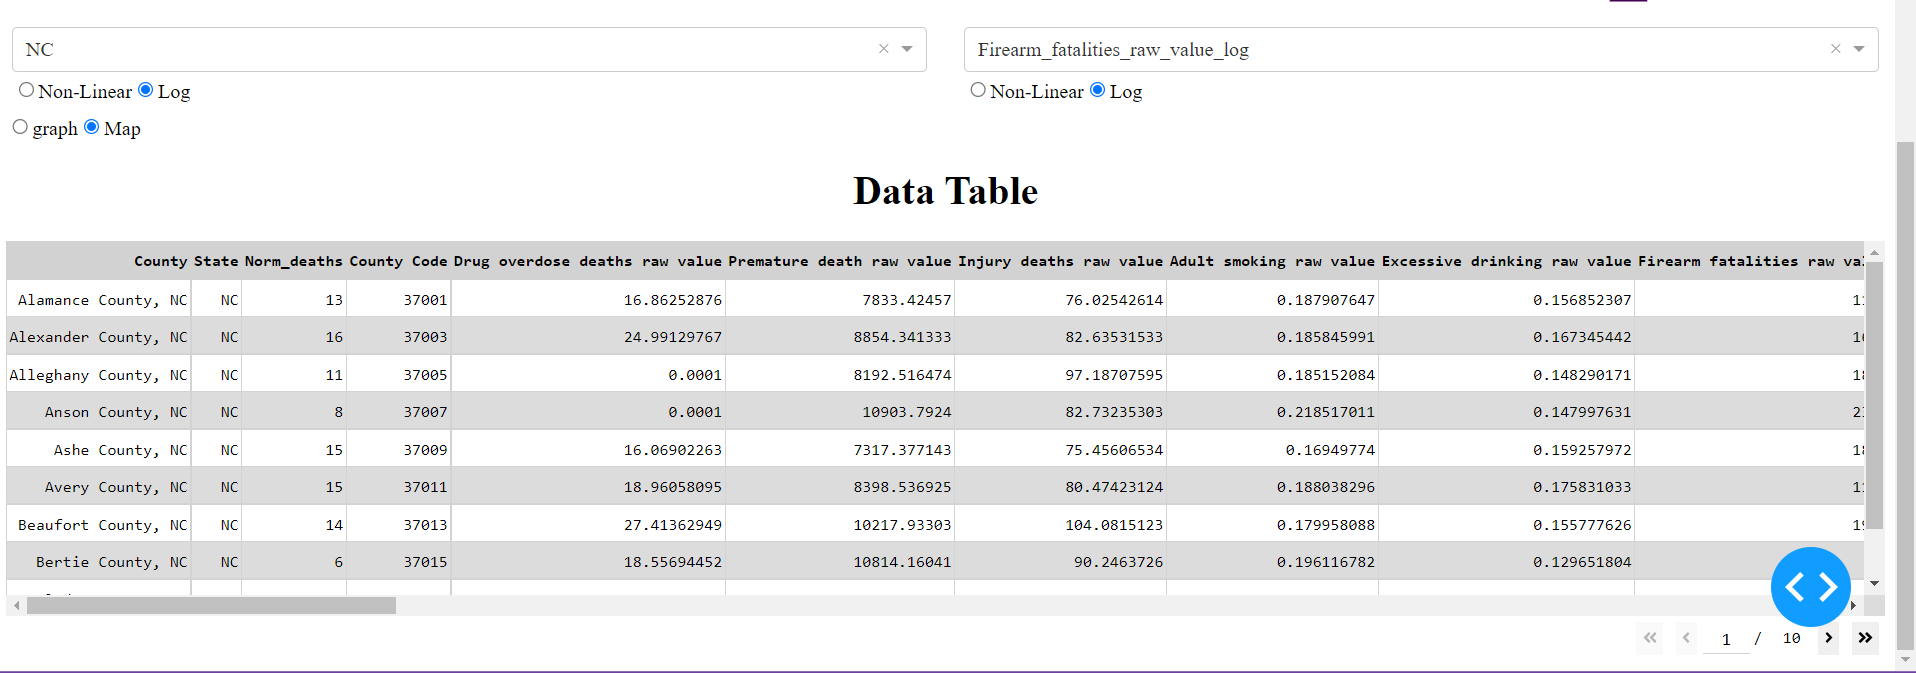

In [10]:
Image(filename='datatable.png',width=1200, height=400)

### Map

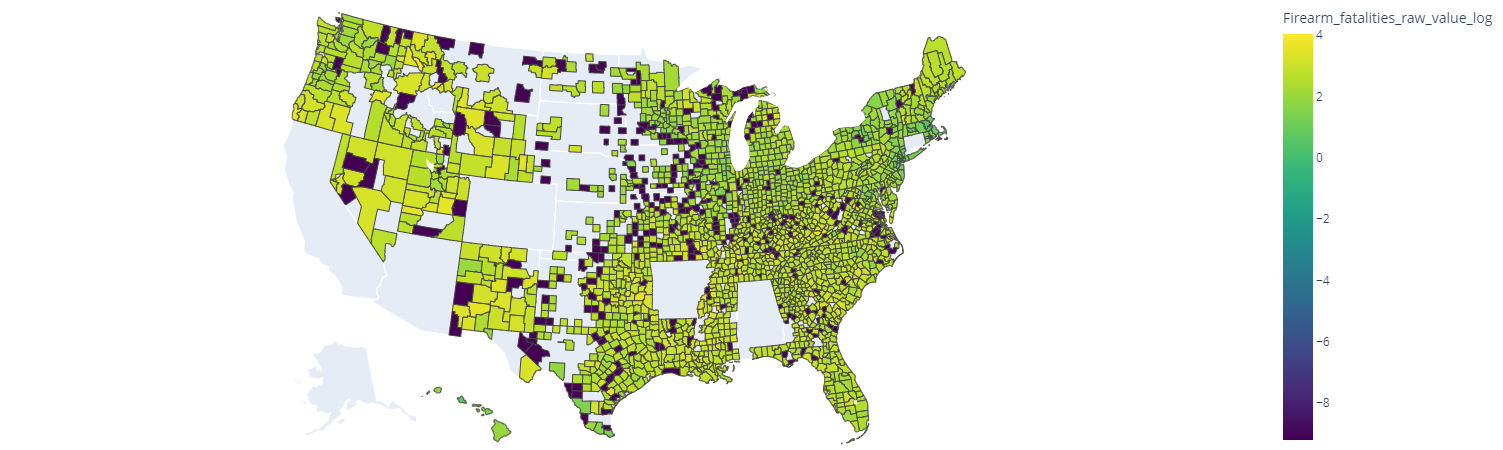

In [11]:
Image(filename='newplot.png',width=1200, height=400)

### Scatterplot with Non Linear and NonLinear as selected radiobuttons

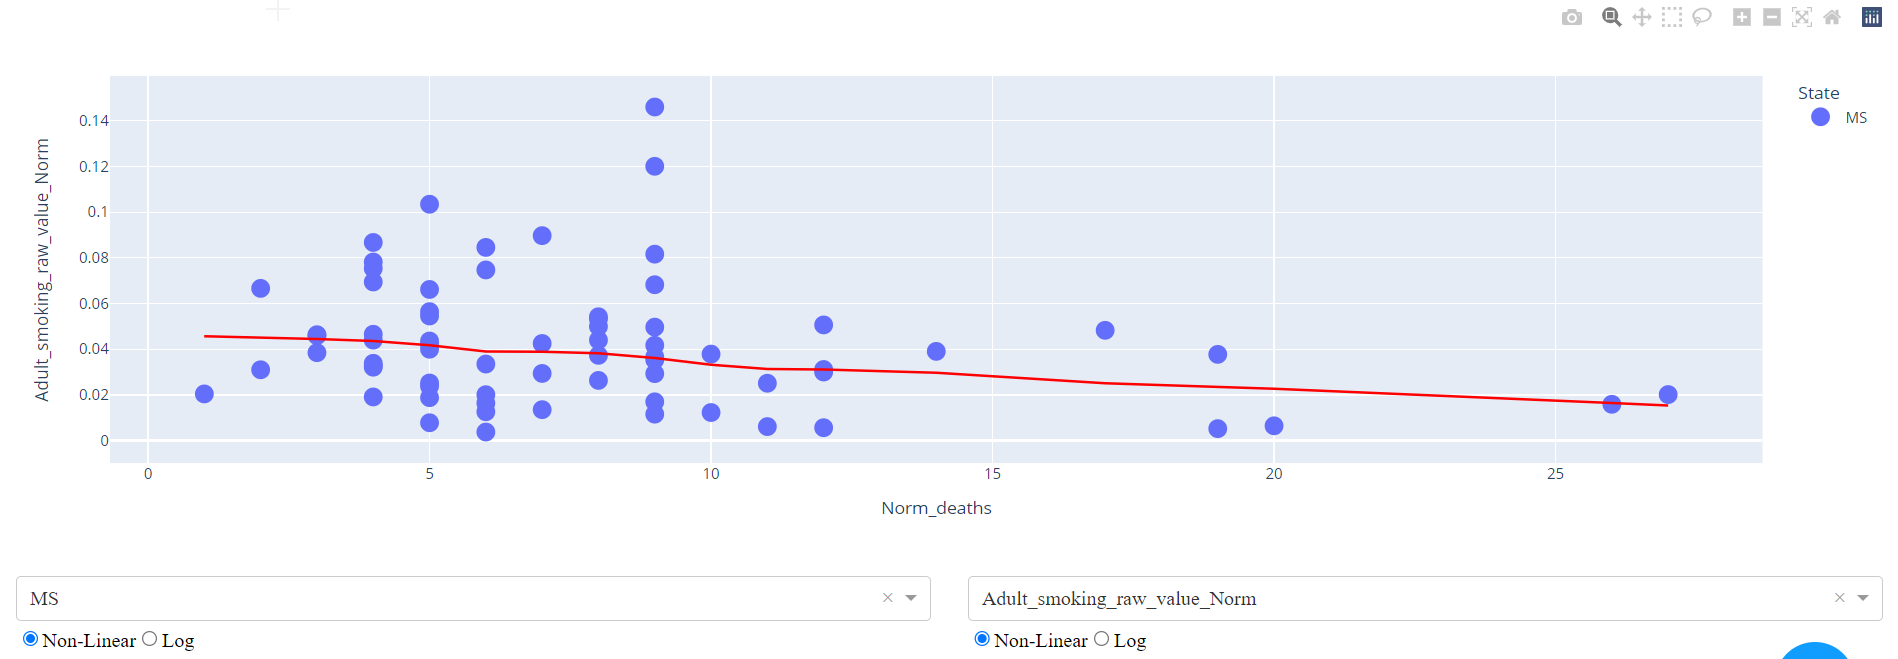

In [12]:
Image(filename='NN.png',width=1200, height=400)

### Scatterplot with Non Linear and Log as selected radiobuttons

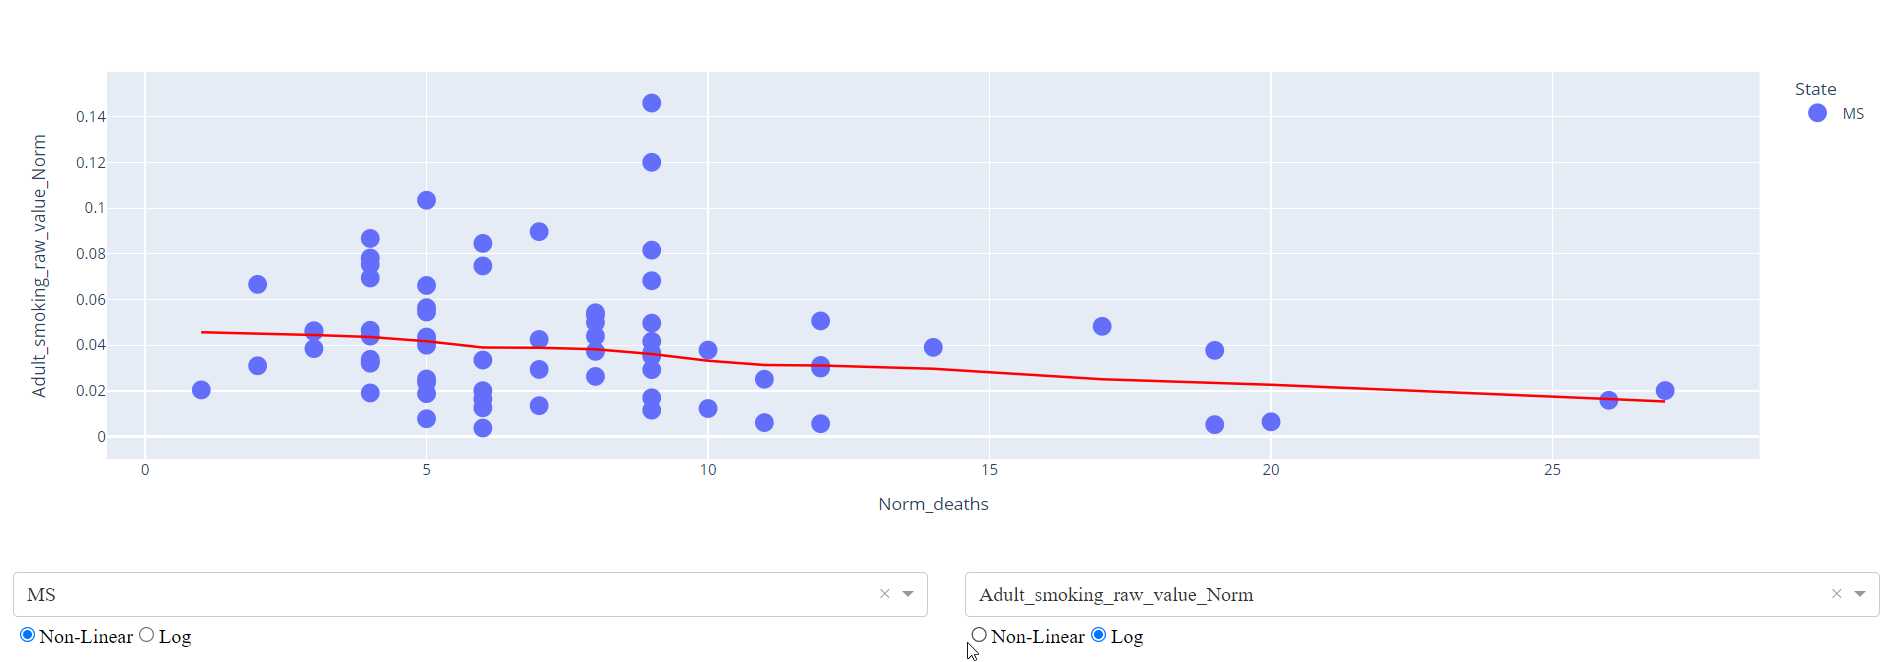

In [13]:
Image(filename='NL.png',width=1200, height=400)

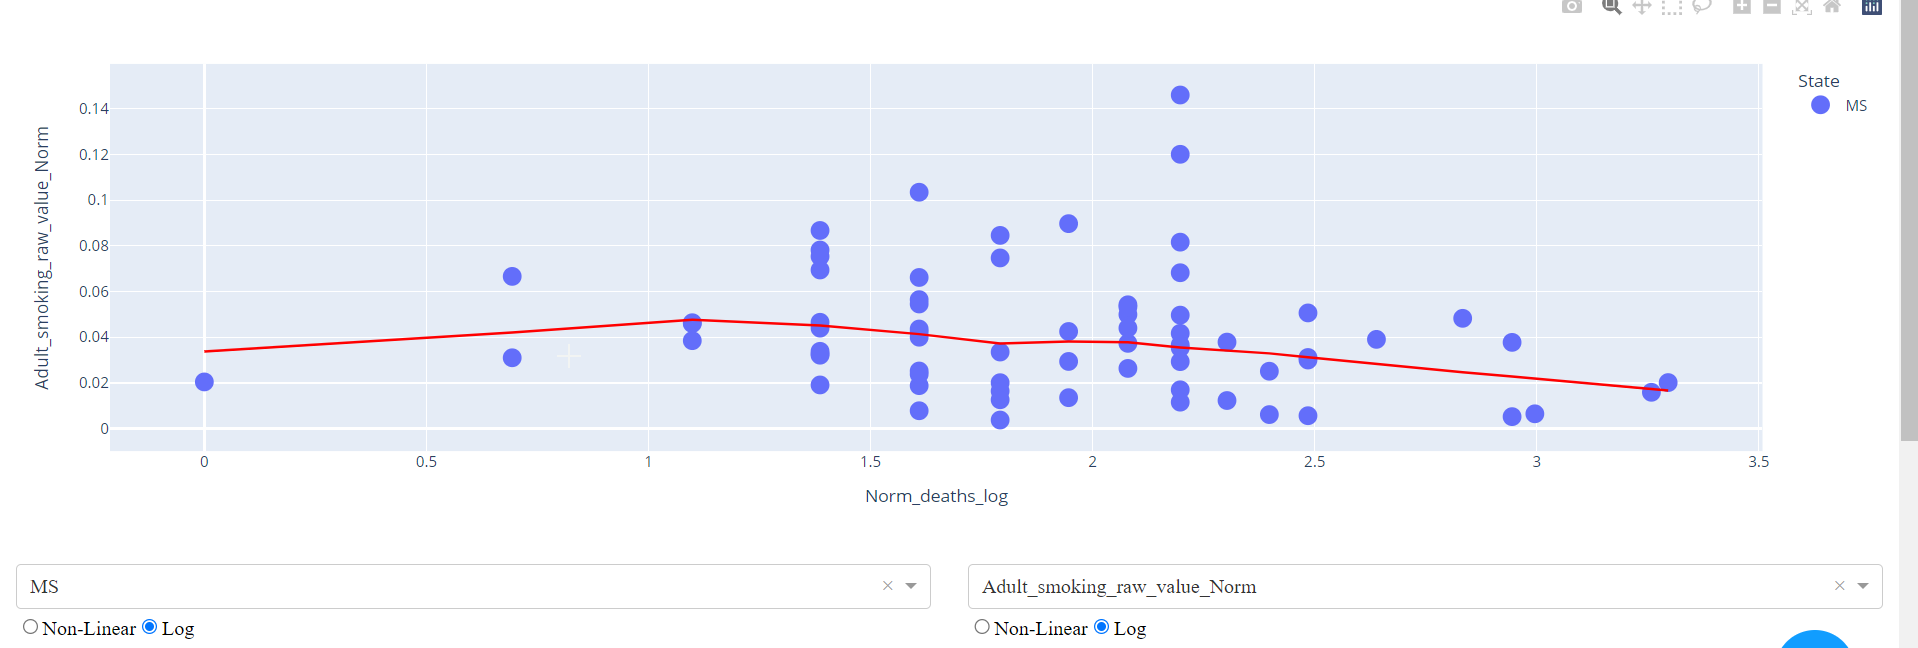

In [14]:
Image(filename='LL.png',width=1200, height=400)

### Scatterplot with Log and NonLinear as selected radiobuttons

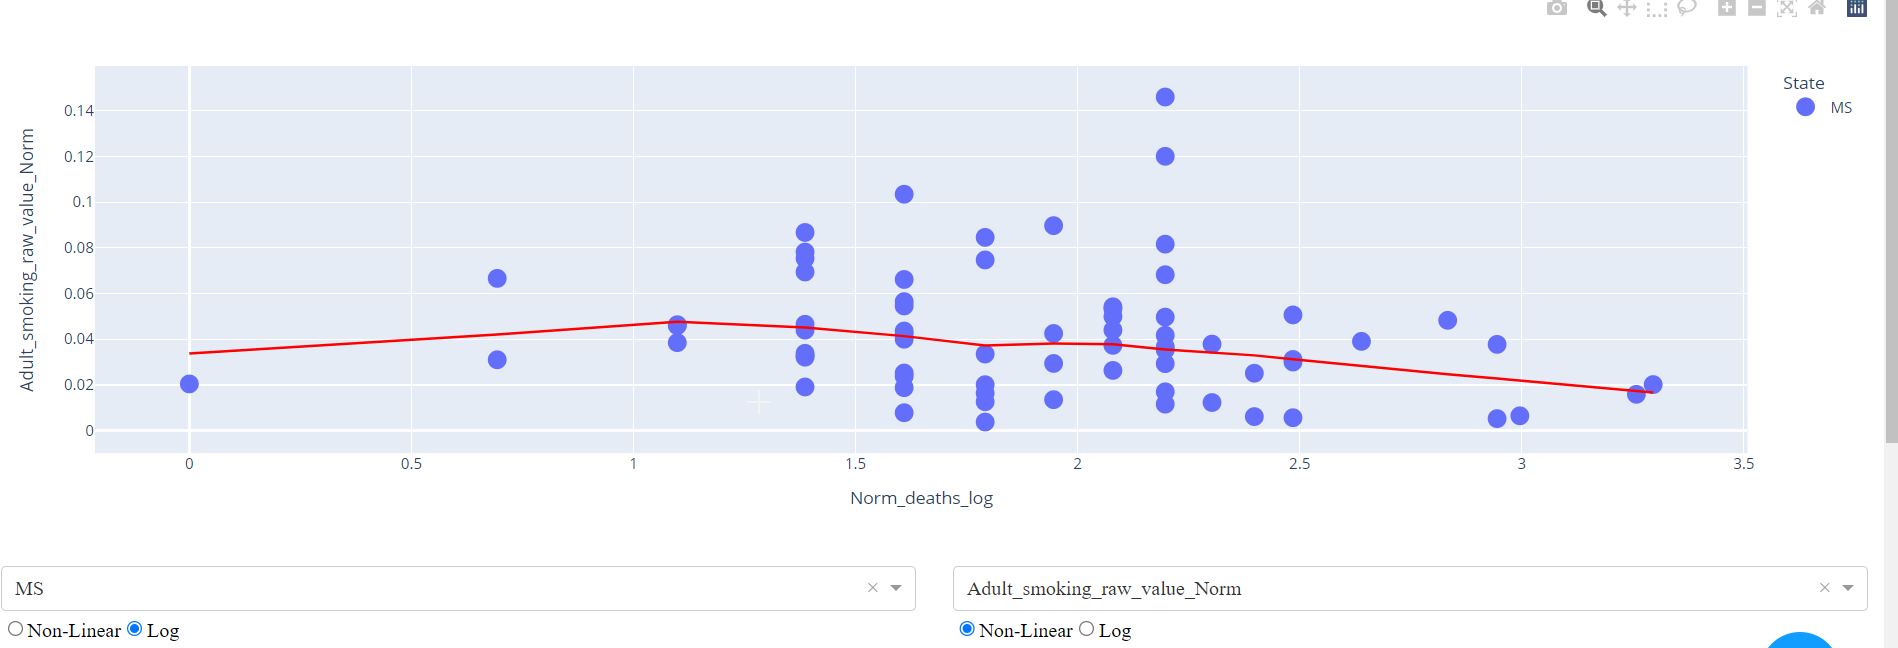

In [15]:
Image(filename='LNL.png',width=1200, height=400)

### Note: To view the entire dashboard run the notebook and also a GIF file is uploaded in the member task folder.

#### References: 
    
* https://dash.plotly.com/datatable#:~:text=DataTable%20)%20is%20an%20interactive%20table,completely%20customizable%20through%20its%20properties.

* https://dash.plotly.com/datatable/style

* https://dash.plotly.com/datatable/dropdowns

* https://www.youtube.com/watch?v=stgbYj1QqsA&t=716s

* https://plotly.com/python/linear-fits/

* https://dash.plotly.com/interactive-graphing?_gl=1*1wezxz3*_ga*MTQ1MjU1NTY1LjE2NjY2MzgyMDM.*_ga_6G7EE0JNSC*MTY2OTkzNTAyOS4yNS4xLjE2Njk5MzUwNzUuMC4wLjA.#update-graphs-on-hover